# Visualizing Geospatial Data from a GPKG File

**Author:** Javed Ali  

**Date:** July 6th, 2023  

**Email:** javed.ali@ucf.edu  


**Description**

Geopackage (GPKG) is an open format for geographic information system data. It's used for storing multiple vector layers, raster maps, and tables in a single SQLite database file.

This script reads a GPKG file, lists all the layers, and then plots each layer using `geopandas` and `matplotlib`.

**Required Libraries**
- `geopandas`: for reading and handling geospatial data.
- `matplotlib`: for visualizing the data.
- `fiona`: for reading and writing vector data formats. Geopandas is built on top of Fiona. We use Fiona to list all layers in the GPKG file.
- `numpy`: for handling NaN, infinite values or invalid geometries in the data. 


>If you do not have these libraries installed, you can install them using pip:
>
>```sh
>pip install geopandas matplotlib fiona
>```

## Import Libraries

Let's import the libraries that we will need.

In [1]:
!pip install watermark -q

In [5]:
# import all required libs
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona

import os

%reload_ext watermark

In [6]:
%watermark

Last updated: 2023-07-06T15:57:39.047038+00:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.14.0

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 14
Architecture: 64bit



In [7]:
# check the directory
os.getcwd()

'/home/jovyan/data/ngen-cfe-hydrological-model/notebooks/ngen'

## Specify File Path

We need to specify the path to the GPKG file that we want to read.

In [8]:
# Path to your GPKG file
gpkg_file_path = 'wb-694855/config/wb-694855_upstream_subset.gpkg'

## List All Layers in the GPKG File

GPKG files can contain multiple layers. We will use Fiona to list all the layers present in the GPKG file.

In [10]:
# List all layers in the GPKG file
layers = fiona.listlayers(gpkg_file_path)

## Load and Visualize Each Layer

We loop through each layer in the GPKG file, load it into a GeoDataFrame, and then visualize it. For each layer, we also print out the attribute columns (variables).

Variables in layer "flowpaths": ['id', 'toid', 'mainstem', 'order', 'hydroseq', 'lengthkm', 'areasqkm', 'tot_drainage_areasqkm', 'has_divide', 'divide_id', 'geometry']
First few rows of the data:
           id        toid  mainstem  order  hydroseq  lengthkm   areasqkm  \
0  cat-696657  nex-696466   2109308    1.0     23167  3.939844   4.726350   
1  cat-696466  nex-694726   2108757    2.0     23166  6.677105   8.227368   
2  cat-694726  nex-694727   2104867    2.0     23163  7.705903  10.054610   
3  cat-696467  nex-696468   2108758    1.0     23168  3.261204   7.495645   
4  cat-698646  nex-696468   2116647    1.0     23169  2.401736   1.789198   

   tot_drainage_areasqkm  has_divide   divide_id  \
0               4.726350        True  cat-696657   
1              18.873731        True  cat-696466   
2              21.997848        True  cat-694726   
3               7.495645        True  cat-696467   
4               1.789198        True  cat-698646   

                            

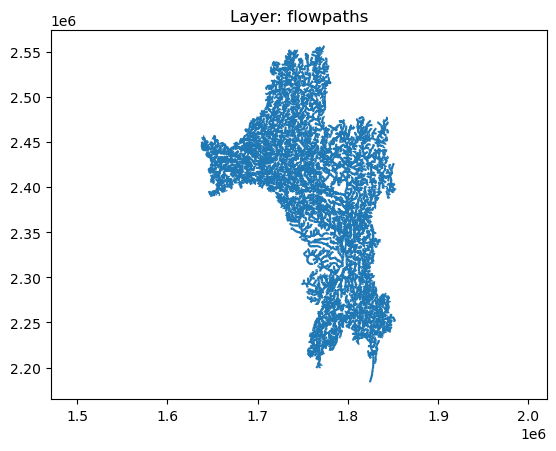

Variables in layer "divides": ['id', 'divide_id', 'toid', 'type', 'ds_id', 'areasqkm', 'lengthkm', 'tot_drainage_areasqkm', 'has_flowline', 'geometry']
First few rows of the data:
           id   divide_id        toid     type  ds_id   areasqkm  lengthkm  \
0  cat-696657  cat-696657  nex-696466  network    NaN   4.726350  3.939844   
1  cat-696466  cat-696466  nex-694726  network    NaN   8.227368  6.677105   
2  cat-694726  cat-694726  nex-694727  network    NaN  10.054610  7.705903   
3  cat-696467  cat-696467  nex-696468  network    NaN   7.495645  3.261204   
4  cat-698646  cat-698646  nex-696468  network    NaN   1.789198  2.401736   

   tot_drainage_areasqkm  has_flowline  \
0               4.726350          True   
1              18.873731          True   
2              21.997848          True   
3               7.495645          True   
4               1.789198          True   

                                            geometry  
0  MULTIPOLYGON (((1734915.004 2542784.998,

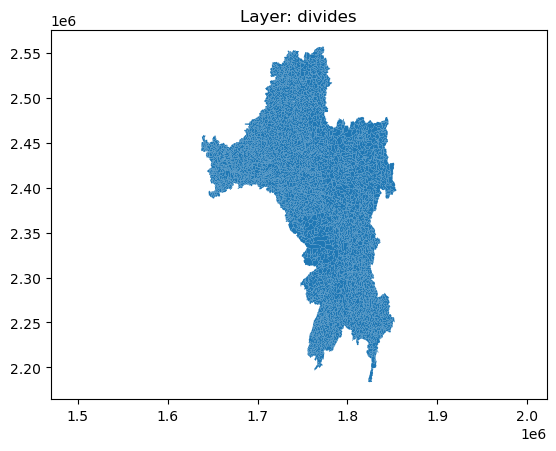

Variables in layer "nexus": ['id', 'toid', 'hl_id', 'hl_uri', 'type', 'geometry']
First few rows of the data:
           id        toid hl_id              hl_uri   type  \
0  nex-694856  cat-694856   NaN                  NA  nexus   
1  nex-694855  cat-694855   NaN                  NA  nexus   
2  nex-694854  cat-694854   NaN                  NA  nexus   
3  nex-694853  cat-694853   325  HUC12-020301010404    poi   
4  nex-694852  cat-694852   NaN                  NA  nexus   

                          geometry  
0  POINT (1824526.257 2183662.110)  
1  POINT (1825188.308 2186187.810)  
2  POINT (1827038.499 2195011.501)  
3  POINT (1827682.496 2198384.499)  
4  POINT (1828144.498 2205314.502)  


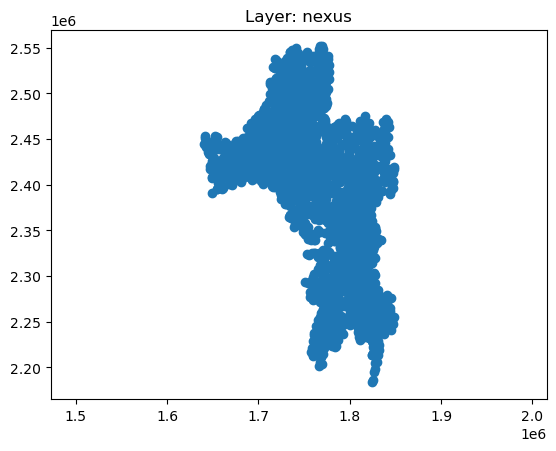

Variables in layer "flowpath_edge_list": ['id', 'toid', 'divide_id', 'ds_id', 'mainstem', 'hl_id', 'hydroseq', 'hl_uri', 'hf_source', 'hf_id', 'lengthkm', 'areasqkm', 'tot_drainage_areasqkm', 'type', 'vpu', 'geometry']
First few rows of the data:
           id        toid divide_id  ds_id  mainstem hl_id  hydroseq hl_uri  \
0  nex-694856  cat-694856       NaN    NaN       NaN   NaN       NaN    NaN   
1  nex-694855  cat-694855       NaN    NaN       NaN   NaN       NaN    NaN   
2  nex-694854  cat-694854       NaN    NaN       NaN   NaN       NaN    NaN   
3  nex-694853  cat-694853       NaN    NaN       NaN   NaN       NaN    NaN   
4  nex-694852  cat-694852       NaN    NaN       NaN   NaN       NaN    NaN   

  hf_source  hf_id  lengthkm  areasqkm  tot_drainage_areasqkm   type vpu  \
0       NaN    NaN       NaN       NaN                    NaN  nexus  02   
1       NaN    NaN       NaN       NaN                    NaN  nexus  02   
2       NaN    NaN       NaN       NaN            

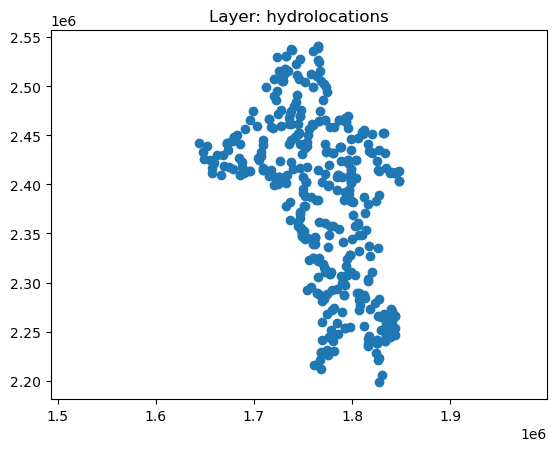

Variables in layer "lakes": ['id', 'toid', 'hl_id', 'hl_reference', 'hl_link', 'hl_uri', 'Dam_Length', 'ifd', 'LkArea', 'LkMxE', 'OrificeA', 'OrificeC', 'OrificeE', 'time', 'WeirC', 'WeirE', 'WeirL', 'geometry']
First few rows of the data:
           id        toid hl_id hl_reference     hl_link          hl_uri  \
0  nex-694928  cat-694928  5086         WBIn  22741995.0   WBIn-22741995   
1  nex-694931  cat-694931  3028        WBOut  22741995.0  WBOut-22741995   
2  nex-695052  cat-695052  4476         WBIn   6228142.0    WBIn-6228142   
3  nex-695057  cat-695057  5124        WBOut   6228142.0   WBOut-6228142   
4  nex-695144  cat-695144  4469         WBIn  22739135.0   WBIn-22739135   

   Dam_Length  ifd   LkArea       LkMxE  OrificeA  OrificeC    OrificeE  time  \
0        10.0  0.9  10.5550  373.660004       1.0       0.1  361.773326   0.0   
1        10.0  0.9  10.5550  373.660004       1.0       0.1  361.773326   0.0   
2        10.0  0.9  11.2164   70.699997       1.0       0.1 

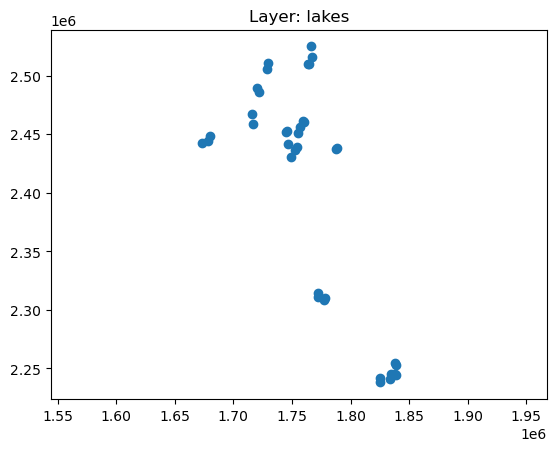

In [15]:
# Load and visualize each layer in the GPKG file
for layer_name in layers:
    # Load a specific layer from the GPKG file into a GeoDataFrame
    geodata = gpd.read_file(gpkg_file_path, layer=layer_name)
    
    # Print attribute columns (variables) for the layer
    # The columns represent different attributes or 'variables' associated with each feature in the layer
    print(f'Variables in layer "{layer_name}": {geodata.columns.tolist()}')
    
    # Print the first few rows of the GeoDataFrame
    print("First few rows of the data:")
    print(geodata.head())
    
    # Check for invalid geometries and remove them
    # Invalid geometries are those that do not follow the rules for correctly formed geometries
    # For example, polygons should not have self-intersections
    geodata = geodata.loc[geodata.geometry.is_valid]
    
    # Check for infinite or NaN values in the geometry and remove them
    # This is necessary because infinite or NaN values can cause errors during plotting
    geodata = geodata.loc[~geodata.geometry.apply(lambda geom: np.isinf(geom.bounds).any() or np.isnan(geom.bounds).any())]

    # Check if the GeoDataFrame is empty before plotting
    # This is necessary because if all rows were removed due to invalid geometries or NaN values, the GeoDataFrame would be empty
    # Attempting to plot an empty GeoDataFrame would result in an error
    if not geodata.empty:
        # Plot the GeoDataFrame
        # We also specify aspect=1 to disable geopandas' auto setting for aspect ratio
        ax = geodata.plot(aspect=1)
        
        # Set the aspect ratio to be equal
        # This means the units in the x and y directions will be the same
        plt.axis('equal')
        
        # Add a title to the plot
        plt.title(f'Layer: {layer_name}')
        
        # Show the plot
        plt.show()
    else:
        # If the GeoDataFrame is empty, print a message saying that the layer is empty or contains invalid geometries
        print(f'Layer "{layer_name}" is empty or contains invalid geometries.')
